<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf

# Εισαγωγή Δεδομένων

In [75]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,0,0.0,0.0
1,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
2,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
3,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
4,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1254,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1255,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1256,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


In [76]:
df = df.drop(columns=["Volume", "Dividends", "Stock Splits"])
df

,Date,Open,High,Low,Close
0,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
1,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
2,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
3,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
4,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
...,...,...,...,...,...
1253,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1254,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1255,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1256,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


# 1. Line Plot

In [77]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

# 2. Στατική ή μη στατική χρονοσειρά

Με γυμνό μάτι φαίνεται ότι δεν υπάρχει κάποια εποχικότητα στην διακύμανση των τιμών. Επίσης το συγκεκριμένο είδος δεδομένων θα αλλάζει συνεχώς μέση τιμή. Άρα μπορούμε να συμπεράνουμε ότι έχουμε μη στατικές χρονοσειρές.

# 3. Χρήση Regressor

Η χρήση Regressor θα οδηγούσε σε πρόβλεψη τιμής με βάση τα προηγούμενα δεδομένα. Αυτό όμως θα μπορούσε να οδηγήσει σε αποτυχημένες προβλέψεις καθώς σε μη στατικές χρονοσειρές είναι πολύ δύσκολο να κάνεις πετυχημένες προβλέψεις λόγω της μη εποχικότητας και της τάσης των χρονοσειρών να μεταβάλλουν συνεχώς τον μέσο όρο τους, δηλαδή ο μέσος όρος των παρελθοντικών δεδομένων θα είναι διαφορετικός από τον μελλοντικό.

# 4. Τάση Ιουνίου-Ιουλίου 2025

Παρατηρείται μια πτωτική τάση τιμών για το προαναφερθέν διάστημα και οι πιθανές αιτίες θεωρώ ότι ήταν η οικονομική αβεβαιότητα λόγω των επικείμενων εμπορικών πολέμων με την συνεχή επιβολή δασμών από τις ΗΠΑ προς άλλες χώρες καθώς και από την αναμονή για την απόφαση της FED σχετικά με την μείωση η μη των επιτοκίων, γεγονός που επηρεάζει άμεσα βασικούς οικονομικούς δείκτες όπως την ανάπτυξη και τον πληθωρισμό.

# 5. Πρόβλεψη τιμής επόμενης μέρας

Θεωρώ πως δεν είναι δυνατόν να προβλέψουμε την τιμή (close) του δολαρίου για την επόμενη μέρα, αν έχουμε ως πληροφορία τα σημερινά open, high, low, close καθώς οι μεταβλητές που θα επηρεάσουν την αυριανή τιμή είναι απρόβλεπτοι και δεν περιλαμβάνονται στα δεδομένα μας αλλά και δεν υπάρχουν και αρκετά παρελθοντικά δεδομένα σε αυτήν την περίπτωση. Αν χρησιμοποιούσαμε μεγαλύτερο όγκο δεδομένων με περισσότερες μέρες θα μπορούσε να γίνει εκτίμηση για την τάση που υπάρχει στα τελευταία δεδομένα και άρα αν θα μπορούσε να συμπεριλαμβάνει και την αυριανή μέρα.

# 6. Τυχαίος διαχωρισμός των δεδομένων σε train-test

Σε μια χρονοσειρά το μοντέλο πρέπει να εκπαιδευτεί σε παρελθοντικά δεδομένα προκειμένου να προβλέψει κάποια μελλοντικά. Ο τυχαίος διαχωρισμός train-test θα σήμαινει ότι μπορεί να χρησιμοποιήσουμε ως train δεδομένα τιμές του 2025 και να προβλέψουμε τιμές του 2023. Κάτι τέτοιο θα οδηγούσε σίγουρα σε λάθος αποτελέσματα και μη έγκυρες προβλέψεις τιμών.

# 7. Χωρισμός σε train-test δεδομένα για πριν το 2024 και κατόπιν αφαίρεση του Date

In [78]:
train_df = df[df['Date'] < '2024-01-01 00:00:00'].drop(columns='Date')
test_df = df[(df['Date'] >= '2024-01-01 00:00:00') & (df['Date'] < '2025-01-01 00:00:00')].drop(columns='Date')
train_df.shape, test_df.shape

((793, 4), (252, 4))

# 8. Δημιουργία συνάρτησης με όρισμα ένα dataframe που επιστρέφει 2 numpy arrays: Inputs (x) και Targets (y)

In [79]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - n):
        end = i + n
        timeframes.append(data_array[i:end])
        timeframe_targets.append(data_array[end, -1])

    return np.array(timeframes), np.array(timeframe_targets)


inputs, targets = create_timeframes(df, 5)
inputs[0], inputs.shape, targets.shape

(array([[Timestamp('2020-11-04 00:00:00-0500', tz='America/New_York'),
         93.08999633789062, 94.30000305175781, 93.08999633789062,
         93.41000366210938],
        [Timestamp('2020-11-05 00:00:00-0500', tz='America/New_York'),
         93.33999633789062, 93.55000305175781, 92.48999786376953,
         92.52999877929688],
        [Timestamp('2020-11-06 00:00:00-0500', tz='America/New_York'),
         92.56999969482422, 92.81999969482422, 92.18000030517578,
         92.2300033569336],
        [Timestamp('2020-11-09 00:00:00-0500', tz='America/New_York'),
         92.23999786376953, 92.95999908447266, 92.12999725341797,
         92.7300033569336],
        [Timestamp('2020-11-10 00:00:00-0500', tz='America/New_York'),
         92.76000213623047, 92.97000122070312, 92.5999984741211, 92.75]],
       dtype=object),
 (1253, 5, 5),
 (1253,))

# 9. Μέγεθος timeframe για πρόβλεψη της επόμενης ημέρας

Στην περίπτωση οικονομικών τιμών οι παράγοντες που μπορεί να επηρεάζουν τις τιμές είναι πολλές φορές απρόβλεπτοι οπότε όσο περισσότερα δεδομένα μπορούμε να χρησιμοποιήσουμε για train τόσο καλύτερη πρόβλεψη θα μπορούσαμε να πάρουμε. Επίσης υπάρχουν τάσεις που διαρκούν πολύ μεγάλα χρονικά διαστήματα οπότε παίρνοντας ένα μικρό timeframe (πχ. ενός μήνα) μπορεί τα δεδομένα να αντιστοιχούν σε μια μικρογραφία της πολύ μεγαλύτερης εικόνας κι έτσι οι προβλέψεις του μοντέλου να αποτύχουν. Χαρακτηριστικό παράδειγμα είναι το προηγούμενο που συζητήσαμε για τον Ιούνιο-Ιούλιο του 2025 όπου υπήρξε μια τάση μείωσης αλλά η μεγαλύτερη εικόνα έδειχνε κάτι διαφορετικό.

# 10. Δημιουργία x_train, y_train, x_test, y_test με N = 5

In [80]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)

#Boosting models cannot train on timeframes, so we have to convert them into input vectors.
n = 5

x_train_flat = x_train.reshape(x_train.shape[0], n*4)
x_test_flat = x_test.reshape(x_test.shape[0], n*4)
x_train_flat.shape, x_test_flat.shape

print(x_train_flat.shape, y_train.shape)
print(x_test_flat.shape,  y_test.shape)

print(x_train[0])


(788, 20) (788,)
(247, 20) (247,)
[[93.08999634 94.30000305 93.08999634 93.41000366]
 [93.33999634 93.55000305 92.48999786 92.52999878]
 [92.56999969 92.81999969 92.18000031 92.23000336]
 [92.23999786 92.95999908 92.12999725 92.73000336]
 [92.76000214 92.97000122 92.59999847 92.75      ]]


# 11. Εφαρμογή μοντέλων

          Model  Train_MAE  Test_MAE
0        Linear   0.345450  0.284249
1  RandomForest   0.144070  0.316273
2       Bagging   0.155382  0.348866
3       XGBoost   0.022125  0.360963
4      Stacking   0.360890  0.289210


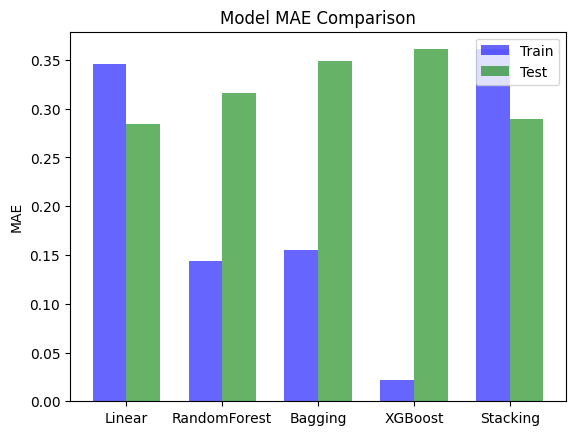

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "XGBoost": XGBRegressor(),
    "Stacking": StackingRegressor(
        estimators=[
            ("lr", LinearRegression()),
            ("dt", DecisionTreeRegressor())
        ])
}

results = []
for name, model in models.items():
    model.fit(x_train_flat, y_train)
    train_mae = mean_absolute_error(y_train, model.predict(x_train_flat))
    test_mae = mean_absolute_error(y_test, model.predict(x_test_flat))
    results.append({"Model": name, "Train_MAE": train_mae, "Test_MAE": test_mae})


df = pd.DataFrame(results)
print(df)

x = np.arange(len(df["Model"]))
width = 0.35

plt.bar(x - width/2, df["Train_MAE"], width=width, color="blue", label="Train", alpha=0.6)
plt.bar(x + width/2, df["Test_MAE"], width=width, color="green", label="Test", alpha=0.6)

plt.xticks(x, df["Model"])
plt.ylabel("MAE")
plt.title("Model MAE Comparison")
plt.legend()
plt.show()

Linear Regression: Αυτό το μοντέλο ακολουθεί διαδικασία προσδιορισμού της σχέσης μιας συνεχούς μεταβλητής y με μια ή περισσότερες άλλες μεταβλητές x1, x2, … , xn.

Random Forest: Δημιουργεί πολλά διαφορετικά δέντρα με διαφορετικά υποσύνολα δεδομένων αλλά και διαφορετικά χαρακτηριστικά προκειμένου να επιτύχει την βέλτιστη πρόβλεψη.

Bagging: Έχει ομοιότητα με το Random Forest μοντέλο καθώς κι αυτό δημιουργεί πολλά διαφορετικά υποσύνολα δεδομένων με την διαφορά ότι χειρίζεται μόνο τα δεδομένα και όχι τα χαρακτηριστικά.

XGBoost: Δημιουργεί σειρά από δέντρα, το κάθε νέο δέντρο προσπαθεί να διορθώσει τα λάθη του προηγούμενου.

Stacking: Χρησιμοποιεί συνδυασμό μοντέλων για εκπαίδευση και στην συνέχεια χρησιμοποιεί ένα νέο μοντέλο για να εκπαιδευτεί με το output των προηγούμενων, το οποίον συνήθως θα είναι Linear Regression.